## **Цель**:

* тестирование производительности локального ПК на алгоритме "***3n + 1***" обработки данных в библиотеках ***pandas*** и с применением ***swifter*** и сравнение производительности библиотек

* построить график распределения долей первых чисел расчета алгоритма с накоплением

In [1]:
import pandas as pd
import numpy as np
import time
import bamboolib
import swifter

import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer.width = 1000
png_renderer.height = 1000
pio.renderers.default = "png"

Рассмотрим кол-во чисел в промежутке от 3 до 10.000

## Сравнение скокрости расчета для каждой библиотека

### Pandas

#### 1-й способ

In [2]:
start = time.time()

n = 10000

df = pd.DataFrame()

for i in range(3, n):
    df_ = pd.DataFrame()
    list_ = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])
    list_[int(str(i)[0]) - 1]  += 1
    df_['num'] = [i]
    while i > 1:
        if i % 2 == 1:
            i = i * 3 + 1 
            list_[int(str(i)[0]) - 1]  += 1
        else:
            i = i / 2
            list_[int(str(i)[0]) - 1]  += 1
    
    df_['list_'] = [list_]
    df = pd.concat([df, df_], ignore_index=True)
print(time.time() - start)

10.360003232955933


#### 2-й способ

In [3]:
start = time.time()

n = 10000

df = pd.DataFrame(list(range(3, n)))
import pandas as pd; import numpy as np
df.columns = [str(column) for column in df.columns]
# Step: Rename column
df = df.rename(columns={'0': 'num'})

def list_n(col):
    list_ = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])
    list_[int(str(col)[0]) - 1]  += 1
    while col > 1:
        if col % 2 == 1:
            col = col * 3 + 1 
            list_[int(str(col)[0]) - 1]  += 1
        else:
            col = col / 2
            list_[int(str(col)[0]) - 1]  += 1
    return list_

df['list_'] = df.num.apply(list_n)

print(time.time() - start)
df

0.6479413509368896


       num                               list_
0        3         [3, 1, 1, 1, 1, 0, 0, 1, 0]
1        4         [1, 1, 0, 1, 0, 0, 0, 0, 0]
2        5         [2, 1, 0, 1, 1, 0, 0, 1, 0]
3        6         [3, 1, 1, 1, 1, 1, 0, 1, 0]
4        7         [6, 4, 1, 2, 2, 0, 1, 1, 0]
...    ...                                 ...
9992  9995       [23, 11, 7, 6, 4, 3, 3, 5, 4]
9993  9996  [52, 31, 25, 19, 15, 11, 11, 9, 7]
9994  9997  [53, 31, 25, 18, 15, 11, 11, 9, 7]
9995  9998     [26, 15, 11, 11, 6, 6, 6, 5, 6]
9996  9999     [25, 16, 11, 11, 7, 7, 5, 4, 6]

[9997 rows x 2 columns]

**pd.concat** в цикле увеличивает время обработки данных почти в 20 раз

Возьмем 10 циклов и получим среднее значение расчета для варианта с ф-цией

In [4]:
def list_n(col):
    list_ = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])
    list_[int(str(col)[0]) - 1]  += 1
    while col > 1:
        if col % 2 == 1:
            col = col * 3 + 1 
            list_[int(str(col)[0]) - 1]  += 1
        else:
            col = col / 2
            list_[int(str(col)[0]) - 1]  += 1
    return list_

In [5]:
time_pandas = []

df = pd.DataFrame()

n = 10000

for cicle in range(1, 11):
    
    start = time.time()

#     n = 10000

    df = pd.DataFrame(list(range(3, n)))
    import pandas as pd; import numpy as np
    df.columns = [str(column) for column in df.columns]
    # Step: Rename column
    df = df.rename(columns={'0': 'num'})

    df['list_'] = df.num.apply(list_n)
    time_pandas.append(time.time() - start)
    
pd.Series(time_pandas).mean()

0.5768739938735962

### Swifter

In [6]:
time_pandas = []

df = pd.DataFrame()

n = 10000

for cicle in range(1, 11):
    
    start = time.time()

#     n = 10000

    df = pd.DataFrame(list(range(3, n)))
    import pandas as pd; import numpy as np
    df.columns = [str(column) for column in df.columns]
    # Step: Rename column
    df = df.rename(columns={'0': 'num'})

    df['list_'] = df.num.swifter.progress_bar(False).apply(list_n)
    time_pandas.append(time.time() - start)
    
pd.Series(time_pandas).mean()

0.6808208465576172

на малых объемах swifter проигрывает pandas

возьмем для расчета 1.000.000 (без цикла)

In [7]:
# pandas
start = time.time()

n = 1000000

df_million = pd.DataFrame(list(range(3, n)))
import pandas as pd; import numpy as np
df_million.columns = [str(column) for column in df_million.columns]
# Step: Rename column
df_million = df_million.rename(columns={'0': 'num'})

df_million['list_'] = df_million.num.apply(list_n)
time.time() - start

89.93550968170166

In [8]:
# swifter
start = time.time()

df_million = pd.DataFrame(list(range(3, n)))
import pandas as pd; import numpy as np
df_million.columns = [str(column) for column in df_million.columns]
# Step: Rename column
df_million = df_million.rename(columns={'0': 'num'})

# df_million['list_'] = df_million.num.swifter.progress_bar(False).apply(list_n)
df_million['list_'] = df_million.num.swifter.apply(list_n)
# df_million_prop = df_million.copy()

time.time() - start

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

46.55641150474548

На больших объемах **swifter** обрабатывает данные быстрее, чем **pandas**

## Графическое представление отличия производительности

In [9]:
n = 200000
step = 10000

pd_list = []
sw_list = []

for cicle in range(4, n+5, step):
        # pandas
    start = time.time()

    df = pd.DataFrame(list(range(3, cicle)))
    import pandas as pd; import numpy as np
    df.columns = [str(column) for column in df.columns]
    # Step: Rename column
    df = df.rename(columns={'0': 'num'})

    df['list_'] = df.num.apply(list_n)
    t = time.time() - start
    pd_list.append(t)
    print(cicle, ':', t)

4 : 0.004942178726196289
10004 : 0.6021831035614014
20004 : 1.247405767440796
30004 : 1.940187692642212
40004 : 2.646747589111328
50004 : 3.4378104209899902
60004 : 4.253983736038208
70004 : 5.120119333267212
80004 : 5.83172345161438
90004 : 6.55907416343689
100004 : 7.3964948654174805
110004 : 8.190255403518677
120004 : 8.768675565719604
130004 : 9.903381586074829
140004 : 10.659498929977417
150004 : 11.487739324569702
160004 : 12.289787530899048
170004 : 12.909996271133423
180004 : 13.640010833740234
190004 : 14.791613101959229
200004 : 15.843111515045166


In [10]:
for cicle in range(4, n+5, step):   
        # swifter
    start = time.time()

    df = pd.DataFrame(list(range(3, cicle)))
    import pandas as pd; import numpy as np
    df.columns = [str(column) for column in df.columns]
    # Step: Rename column
    df = df.rename(columns={'0': 'num'})

    df['list_'] = df.num.swifter.progress_bar(False).apply(list_n)
    # df['list_'] = df.num.swifter.apply(list_n)
    t = time.time() - start
    sw_list.append(t)
    print(cicle, ':', t)

4 : 0.02788543701171875
10004 : 0.6979200839996338
20004 : 2.8989155292510986
30004 : 3.072686195373535
40004 : 3.802067995071411
50004 : 3.8965888023376465
60004 : 4.2254157066345215
70004 : 4.747180223464966
80004 : 5.284864664077759
90004 : 5.095663785934448
100004 : 5.568377494812012
110004 : 5.883141279220581
120004 : 6.861952304840088
130004 : 6.644343614578247
140004 : 7.368683099746704
150004 : 7.976060628890991
160004 : 8.340542316436768
170004 : 8.089183330535889
180004 : 9.169916868209839
190004 : 9.571783781051636
200004 : 9.677801132202148


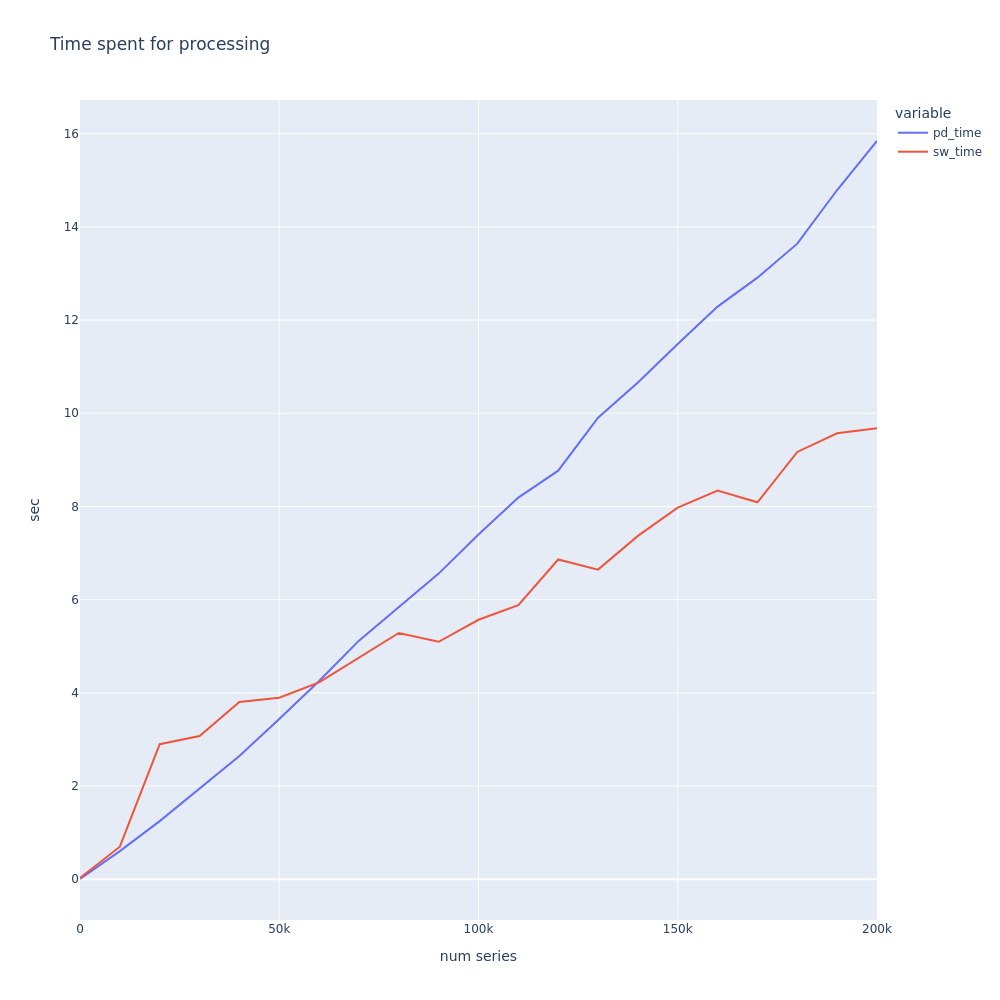

In [11]:
pd_l = pd.DataFrame(pd_list)
sw_l = pd.DataFrame(sw_list)
import pandas as pd; import numpy as np
pd_l.columns = [str(column) for column in pd_l.columns]
import pandas as pd; import numpy as np
sw_l.columns = [str(column) for column in sw_l.columns]
# Step: Rename column
sw_l = sw_l.rename(columns={'0': 'sw_time'})

import pandas as pd; import numpy as np
# Step: Rename column
pd_l = pd_l.rename(columns={'0': 'pd_time'})

libs_time = pd.concat([pd_l, sw_l], axis=1)
libs_time['indx'] = libs_time.index * step + 3

import plotly.express as px
fig = px.line(libs_time.sort_values(by=['indx'], ascending=[True]), x='indx', y=['pd_time', 'sw_time'], title='Time spent for processing')
fig.update_xaxes(title_text='num series')
fig.update_yaxes(title_text='sec')
fig


## График распределения пропорции первых цифр в алгоритме

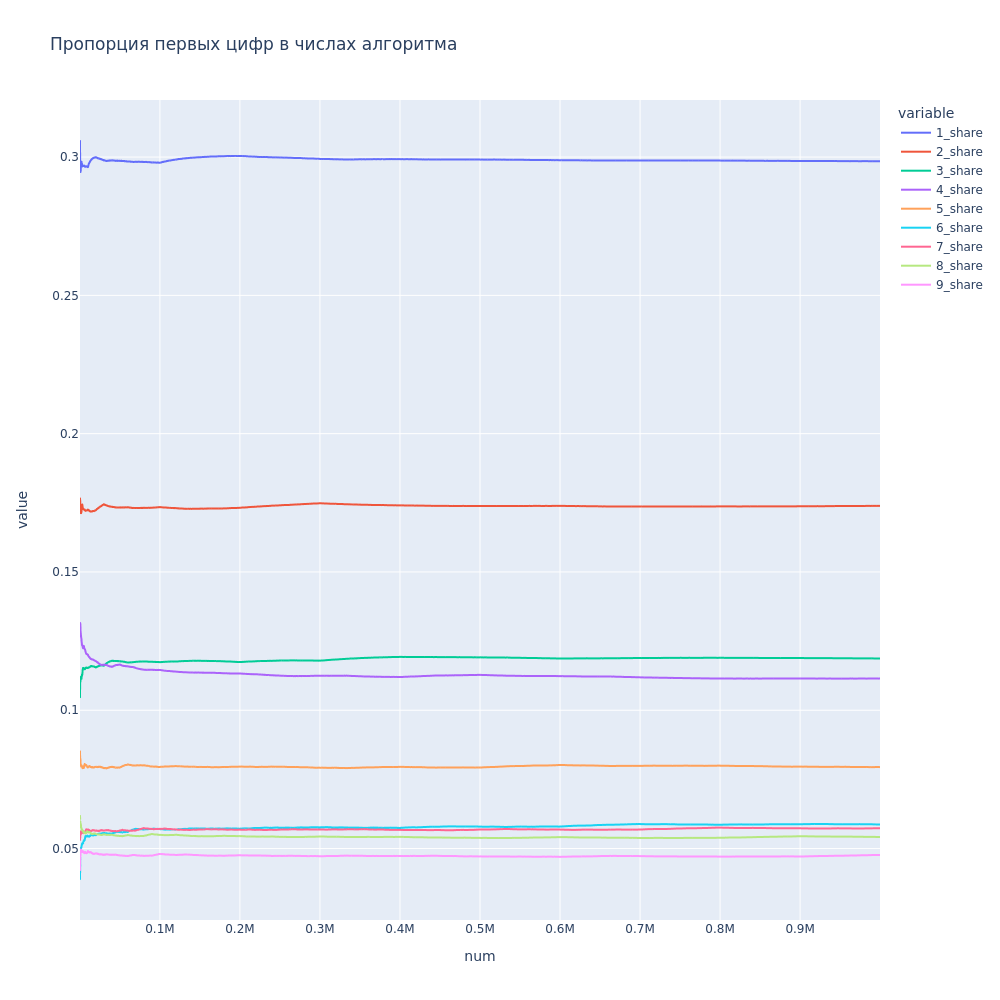

In [12]:
df_prop = df_million.copy()
digits = []
for i in range(1, 10):
    digits.append(str(i) + '_')
df_prop[digits] = pd.DataFrame(df_prop.list_.tolist(), columns = digits)
import pandas as pd; import numpy as np
# Step: Drop columns
df_prop = df_prop.drop(columns=['list_'])

# df_prop['sum_'] = df_prop.loc[:, df_prop.columns.str.contains('_')].sum(axis=1)
df_prop['sum_'] = df_prop.loc[:, '1_': '9_'].sum(axis=1)

for i in digits:
    df_prop[i + '_cumsum'] = df_prop[i].cumsum()

# Step: Select columns
df_prop = df_prop[['num', 'sum_', '1__cumsum', '2__cumsum', '3__cumsum', '4__cumsum', '5__cumsum',\
                   '6__cumsum', '7__cumsum', '8__cumsum', '9__cumsum']]

df_prop['sum_cs'] = df_prop.sum_.cumsum()

for i in df_prop.columns:
    if 'cumsum' in i:
        df_prop[i[:2] + 'share'] = df_prop[i] / df_prop.sum_cs
import pandas as pd; import numpy as np
# Step: Drop columns
df_prop = df_prop.drop(columns=['1__cumsum', '2__cumsum', '3__cumsum', 'sum_', '4__cumsum', '5__cumsum',\
    '6__cumsum', '7__cumsum', '8__cumsum', '9__cumsum'])

import plotly.express as px
fig = px.line(df_prop.sort_values(by=['num'], ascending=[True]).sample(n=10000, replace=False,\
    random_state=123).sort_index(), x='num', y=['1_share', '2_share', '3_share', '4_share', '5_share',\
    '6_share', '7_share', '8_share', '9_share'], title='Пропорция первых цифр в числах алгоритма')
fig

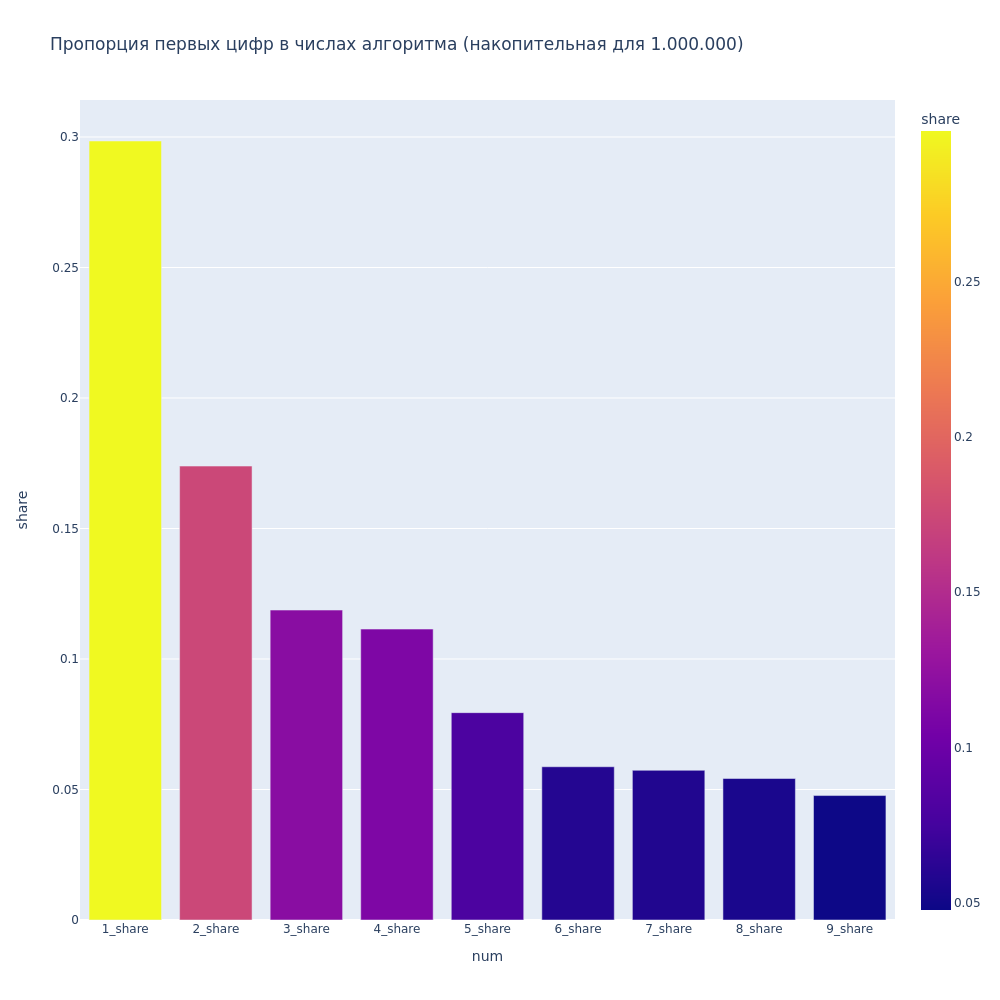

In [13]:
prop = pd.DataFrame(df_prop.iloc[-1])
import pandas as pd; import numpy as np
prop = prop.reset_index()
prop.columns = [str(column) for column in prop.columns]
import pandas as pd; import numpy as np
# Step: Keep rows where index is one of: num, sum_cs
prop = prop.loc[~prop['index'].isin(['num', 'sum_cs'])]

import pandas as pd; import numpy as np
# Step: Rename column
prop = prop.rename(columns={'999996': 'share'})

# Step: Rename column
prop = prop.rename(columns={'index': 'num'})

import plotly.express as px
fig = px.bar(prop, x='num', y='share', color='share', title='Пропорция первых цифр в числах алгоритма (накопительная для 1.000.000)')
fig

## Вывод:

* Библиотека swifter имеет более высокую производительность в сравнении с pandas на данных размером приблизительно более 60.000 строк
* Распределение первых цифр чисел последовательностей алгоритма имеет спадающий характер последовательно от 1 до 9